# Business Understanding

## Project Domain
Proyek ini berada di domain Human Resource (HR) Analytics, di mana organisasi memanfaatkan data karyawan untuk memahami tren kepegawaian dan memprediksi kejadian penting seperti pengunduran diri, promosi, atau status masa depan karyawan.

## Problem Statements
Perusahaan ingin mengidentifikasi karyawan yang kemungkinan besar akan:

bertahan

mengundurkan diri

atau dipromosikan





## Goals
Mengembangkan sebuah model machine learning berbasis data historis karyawan untuk memprediksi masa depan karyawan, khususnya:

Apakah mereka akan tetap, keluar, atau dipromosikan dalam waktu dekat.

Hal ini bertujuan untuk:

Membantu perencanaan tenaga kerja,

Mengurangi tingkat turnover,

Meningkatkan efisiensi strategi retensi dan pengembangan karyawan.

## Solution Statements
Membangun aplikasi berbasis Streamlit yang memungkinkan HR memasukkan data karyawan seperti:

Tahun bergabung,

Pengalaman kerja,

Usia,

...dan kemudian memberikan prediksi mengenai masa depan karyawan berdasarkan model klasifikasi TensorFlow Lite (TFLite) yang telah dilatih.

# Data Understanding

## Import data dari kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nasrulloharrizieq","key":"ad30924c300f469d75ebba8cb3f7608c"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [ ]:
!kaggle datasets download -d tejashvi14/employee-future-prediction

Dataset URL: https://www.kaggle.com/datasets/tejashvi14/employee-future-prediction
License(s): CC0-1.0
  0% 0.00/18.5k [00:00<?, ?B/s]
100% 18.5k/18.5k [00:00<00:00, 78.7MB/s]


In [ ]:
!mkdir employee-future-prediction
!unzip employee-future-prediction.zip -d employee-future-prediction
!ls employee-future-prediction

Archive:  employee-future-prediction.zip
  inflating: employee-future-prediction/Employee.csv  
Employee.csv


## Import Library yang dibutuhkan

In [ ]:
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

## Exploratory Data Analysis

In [ ]:
df = pd.read_csv('employee-future-prediction/Employee.csv')

In [ ]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


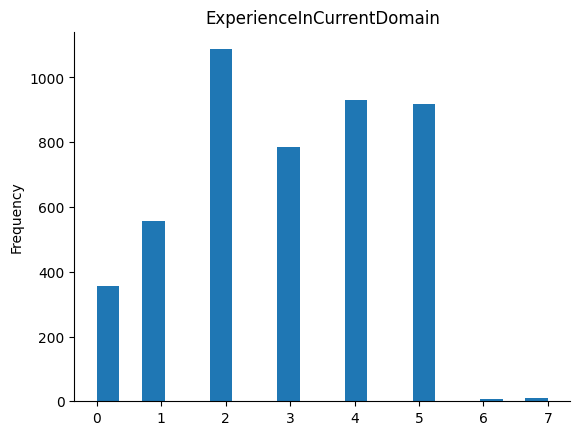

In [ ]:
# @title ExperienceInCurrentDomain

from matplotlib import pyplot as plt
df['ExperienceInCurrentDomain'].plot(kind='hist', bins=20, title='ExperienceInCurrentDomain')
plt.gca().spines[['top', 'right',]].set_visible(False)

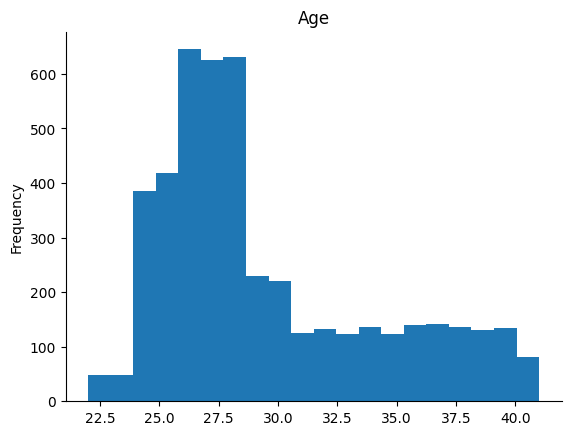

In [ ]:
# @title Age

from matplotlib import pyplot as plt
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

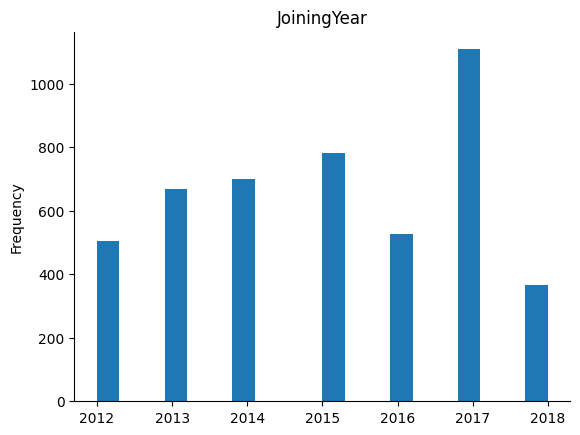

In [ ]:
# @title JoiningYear

from matplotlib import pyplot as plt
df['JoiningYear'].plot(kind='hist', bins=20, title='JoiningYear')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Data Preparation

In [ ]:
X = df.drop(columns=["Education", "City", "Gender", "EverBenched", "PaymentTier"])
y = df['LeaveOrNot']

In [ ]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modeling

In [ ]:
model = keras.Sequential([
    keras.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(2, activation="softmax")
])

In [ ]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,042 (43.13 KB)

 Trainable params: 11,042 (43.13 KB)

 Non-trainable params: 0 (0.00 B)

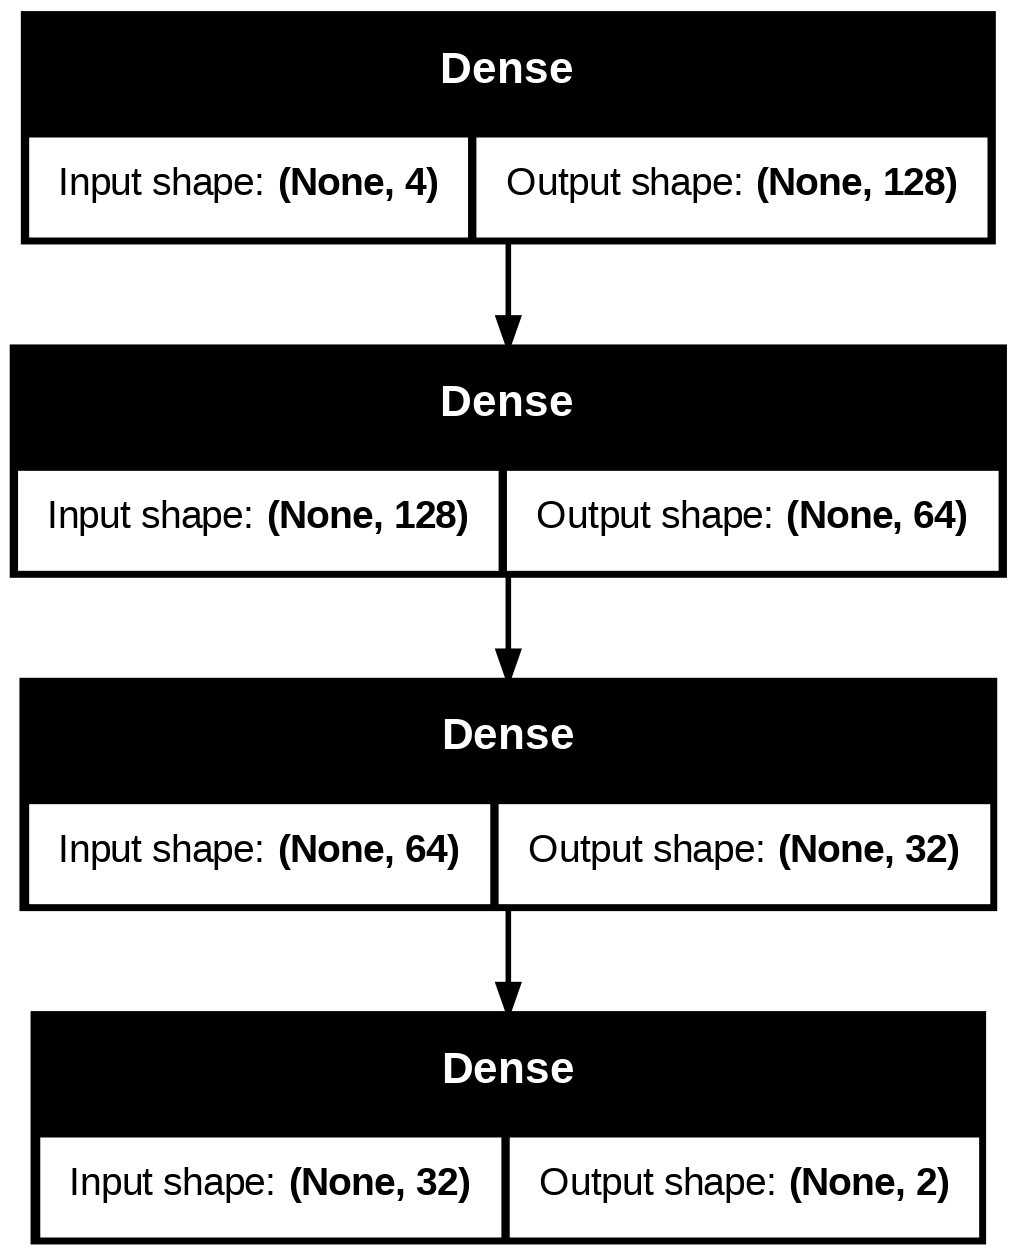

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes = True)

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=16,
                    validation_data=(X_test, y_test))

Epoch 1/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9397 - loss: 0.1842 - val_accuracy: 1.0000 - val_loss: 4.4322e-04
Epoch 2/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 3.0760e-04 - val_accuracy: 1.0000 - val_loss: 1.2042e-04
Epoch 3/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 1.0000 - loss: 9.4178e-05 - val_accuracy: 1.0000 - val_loss: 5.4095e-05
Epoch 4/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 4.5439e-05 - val_accuracy: 1.0000 - val_loss: 2.9987e-05
Epoch 5/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 2.5409e-05 - val_accuracy: 1.0000 - val_loss: 1.8715e-05
Epoch 6/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 1.0000 - loss: 1.6242e-05 - val_accuracy: 1.0000 - val_loss: 1.2574e-05
Epoch 7/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 1.1036e-05 - val_accuracy: 1.0000 - val_loss: 8.9123e-06
Epoch 8/50
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step 

# Evaluation

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Akurasi Model: {test_accuracy:.4f}")
print(f"Loss Model: {test_loss:.4f}")

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 3.9778e-09 
Akurasi Model: 1.0000
Loss Model: 0.0000


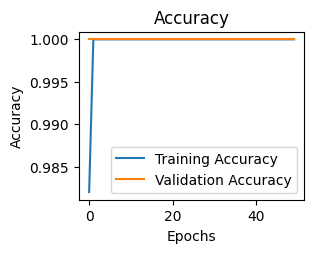

In [ ]:
plt.subplot(2, 2, 4)
plt.plot(history.history["accuracy"], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy')

plt.show()

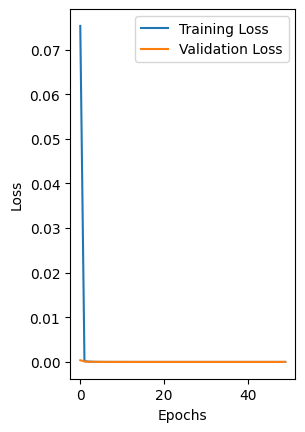

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


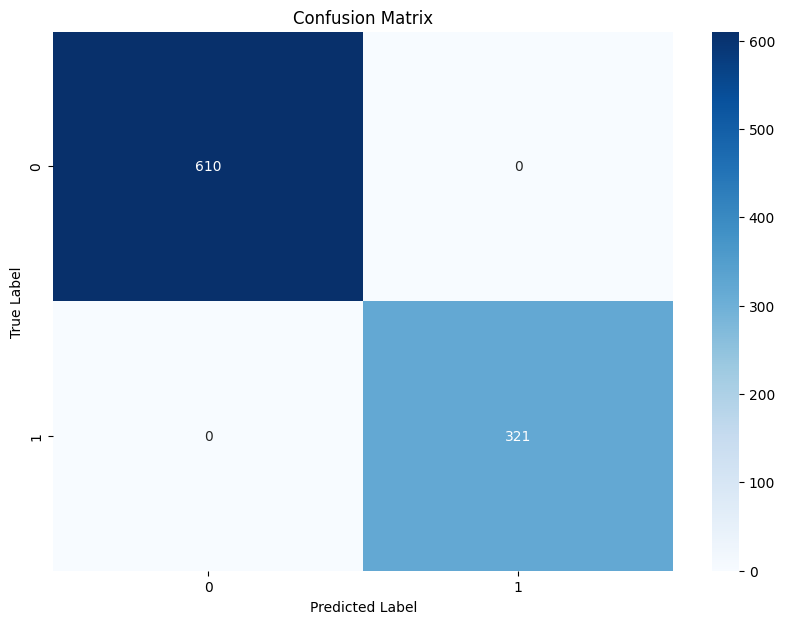

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       610
           1       1.00      1.00      1.00       321

    accuracy                           1.00       931
   macro avg       1.00      1.00      1.00       931
weighted avg       1.00      1.00      1.00       931



In [ ]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

In [ ]:

# Convert to TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("employee_future_model.tflite", "wb") as f:
    f.write(tflite_model)

print("Model .tflite berhasil disimpan.")


Saved artifact at '/tmp/tmpshszxdr1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 4), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 2), dtype=tf.float32, name=None)
Captures:
  133220715072016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133220715073168: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133220715071440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133220715069712: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133220715073744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133220715069904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133220715074128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  133220715072976: TensorSpec(shape=(), dtype=tf.resource, name=None)
Model .tflite berhasil disimpan.
